## 泰坦尼克 数据科学导论大作业

In [2]:
# 处理警告信息
import warnings
warnings.filterwarnings("ignore", message = "numpy.dtype size changed")
# 导入文件库
import pandas as pd 
import numpy as np 
from pandas import Series, DataFrame

data_train = pd.read_csv("train.csv")
data_train.columns # 获得一个包含数据集中所有列标签的列表，并查看数据集的列名
data_train.columns # 获得一个包含数据集中所有列标签的列表，并查看数据集的列名

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
data_train.info()
# 获取数据集 data_train 的详细信息
# 了解数据集的关键信息，包括列数、列名、每列非空值的数量，以及每列的数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1.2 数据基本情况：训练数据中总共有891名乘客，但有些属性的数据不全。
比如：Age（年龄）属性只有714名乘客有记录；Cabin（客舱）仅有204名乘客是已知的；
总共有5个object类的字段需要进行处理  

In [4]:
data_train.describe()
# 生成数据集 data_train 的基本统计描述
# 计算并返回数据集中每个数值列的统计信息，包括计数、平均值、标准差、最小值、25% 分位数、50% 分位数（中位数）、75% 分位数和最大值

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. Survived字段中大概有0.383838的人最后获救了；  
2. 2和3等舱的人数比1等舱要多；  
3. 有数据,已知年龄的乘客，平均年龄大概是29.7岁。  

第2步：分析数据之间的关系

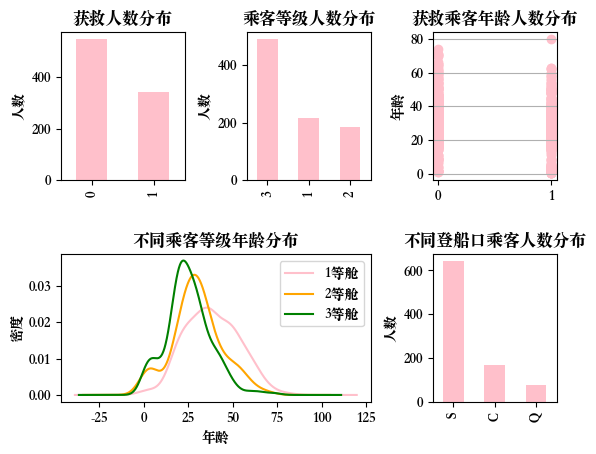

In [5]:
import matplotlib.pyplot as plt

# 中文支持，字体使用了仿宋
plt.rcParams['font.sans-serif'] = ['Songti SC']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

# 第一个子图：获救人数分布
plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar',color='pink')# 绘制存活者与非存活者的柱状图
plt.title(u"获救人数分布") # 标题
plt.ylabel(u"人数")  

# 第二个子图：乘客等级人数分布
plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar",color='pink')
plt.ylabel(u"人数")
plt.title(u"乘客等级人数分布")

# 第三个子图：获救乘客年龄人数分布
plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age,color = 'pink')
plt.ylabel(u"年龄")                         # y轴标签
plt.grid(which='major', axis='y') # 格式化图表的网格线样式
plt.title(u"获救乘客年龄人数分布")

# 第四个子图：不同乘客等级年龄分布
plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde',color='pink')   # 绘制1等舱乘客年龄的密度
data_train.Age[data_train.Pclass == 2].plot(kind='kde',color='orange')
data_train.Age[data_train.Pclass == 3].plot(kind='kde',color='green')
plt.xlabel(u"年龄")
plt.ylabel(u"密度") 
plt.title(u"不同乘客等级年龄分布")
plt.legend((u'1等舱', u'2等舱',u'3等舱'),loc='best') # 图表设置图例

# 第五个子图：不同登船口乘客人数分布
plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar',color='pink')
plt.title(u"不同登船口乘客人数分布")
plt.ylabel(u"人数")  

plt.subplots_adjust(hspace=0.5, wspace=0.5) # 调整图之间的间距
plt.show()

1. 被救的人300多个，不到总人数的一半；  
2. 3等舱获救的乘客最多，其次是1、2等舱；  
3. 遇难和获救的人年龄跨度都很广；  
4. 3个舱的年龄总体趋势差不多，2和3等舱乘客20-25岁的最多，1等舱35-40岁的最多；  
5. 登船港口人数按照S、C、Q递减，而且S港口的人数远高于另外两个港口的人数。  

<Figure size 640x480 with 0 Axes>

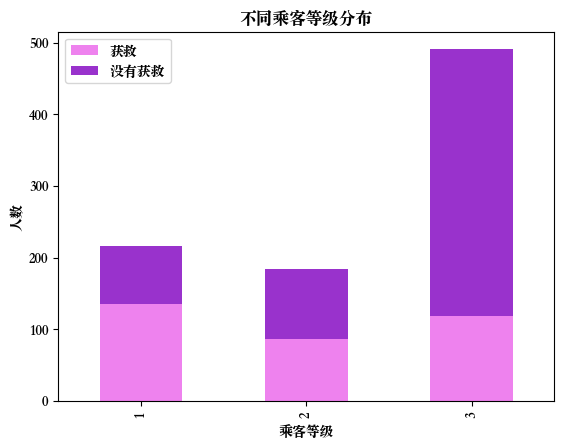

In [6]:
# 不同乘客等级分布
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

# 统计不同乘客等级的获救和未获救人数
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()

# 创建一个DataFrame来存储数据
df=pd.DataFrame({u'获救':Survived_1, u'没有获救':Survived_0})

# 绘制堆叠柱状图
df.plot(kind='bar', stacked=True,color = ['violet','darkorchid'])

plt.title(u"不同乘客等级分布")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 
plt.show()

<Figure size 640x480 with 0 Axes>

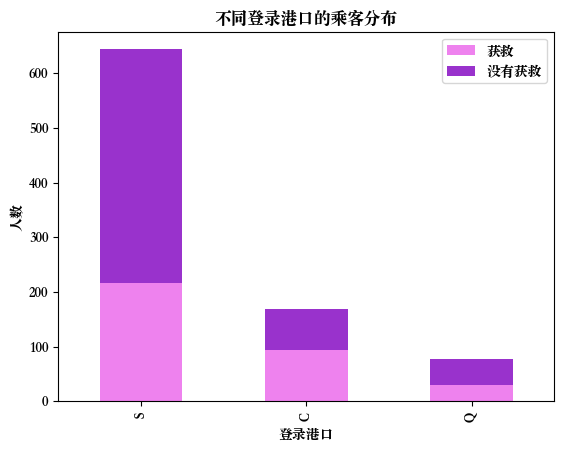

In [7]:
# 不同登录港口的乘客分布
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

# 统计不同登录港口的获救和未获救人数
Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()

# 创建一个DataFrame来存储数据
df=pd.DataFrame({u'获救':Survived_1, u'没有获救':Survived_0})

# 绘制堆叠柱状图
df.plot(kind='bar', stacked=True, color=['violet','darkorchid'])
plt.title(u"不同登录港口的乘客分布")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

<Figure size 640x480 with 0 Axes>

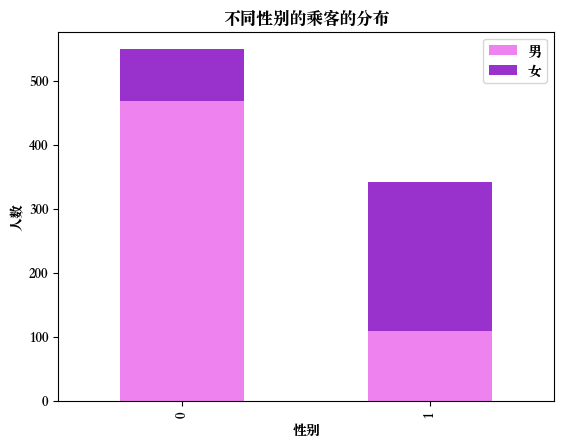

In [8]:
# 不同性别的乘客的分布
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

# 统计不同性别的获救和未获救人数
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()

# 创建一个DataFrame来存储数据
df=pd.DataFrame({u'男':Survived_m, u'女':Survived_f})

# 绘制堆叠柱状图
df.plot(kind='bar', stacked=True, color=['violet','darkorchid'])
plt.title(u"不同性别的乘客的分布")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

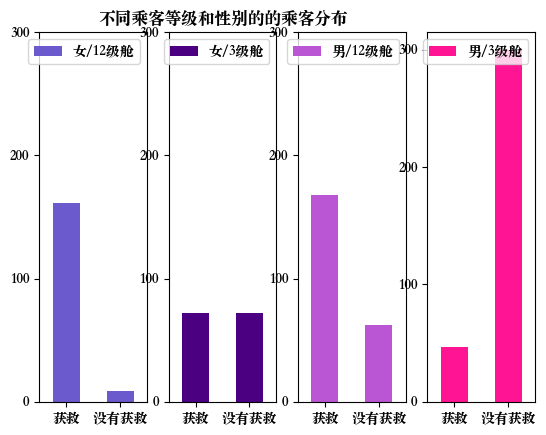

In [9]:
# 根据各乘客等级和性别的乘客分布
S1 = data_train.Sex  # 乘客的性别数据
S2 = data_train.Pclass  # 乘客的等级数据
S3 = data_train.Survived  # 乘客的获救情况数据

plt.subplot(141)  # 创建第一个子图
plt.bar([0,1], S3[S1=='female'][S2!=3].value_counts(), color='slateblue', width=.5)
plt.xticks([0,1],[u'获救',u'没有获救'])
plt.xlim([-.5,1.5])
plt.yticks(range(0,350,100))
plt.legend([u"女/12级舱"], loc='best')

plt.subplot(142)  # 创建第二个子图
plt.bar([0,1], S3[S1=='female'][S2==3].value_counts(), color='indigo', width=.5)
plt.xticks([0,1],[u'获救',u'没有获救'])
plt.xlim([-.5,1.5])
plt.yticks(range(0,350,100))
plt.legend([u"女/3级舱"], loc='best')
plt.title(u"不同乘客等级和性别的的乘客分布")

plt.subplot(143)  # 创建第三个子图
plt.bar([0,1], S3[S1=='male'][S2!=3].value_counts(), color='mediumorchid', width=.5)
plt.xticks([0,1],[u'获救',u'没有获救'])
plt.xlim([-.5,1.5])
plt.yticks(range(0,350,100))
plt.legend([u"男/12级舱"], loc='best')

plt.subplot(144)  # 创建第四个子图
plt.bar([1,0], S3[S1=='male'][S2==3].value_counts(), color='deeppink', width=.5)
plt.xticks([1,0],[u'没有获救',u'获救'])
plt.xlim([-.5,1.5])
plt.yticks(range(0,350,100))
plt.legend([u"男/3级舱"], loc='best')

plt.show()

1. 从各乘客等级的获救情况来看：头等舱和2等舱乘客的幸存概率相对高一些，可以作为特征看看；  
2. 从各登录港口的获救情况来看：S港口人数最多，Q港口人数最少，但生存率都在三分之一左右，C港口的获救人数过半，需要进一步验证，受什么因素影响。性别还是船舱等级？  
3. 从性别来看获救情况：女性获救的概率显然高于男性，因此可作为重要特征；  
4. 从各乘客等级和性别的获救情况来看： 高级船舱对生存率的影响要比性别的略高。  

不同港口的船舱等级、性别情况；不同港口的年龄分布；船票费用和生存的关系；兄妹&配偶数和生存的关系  

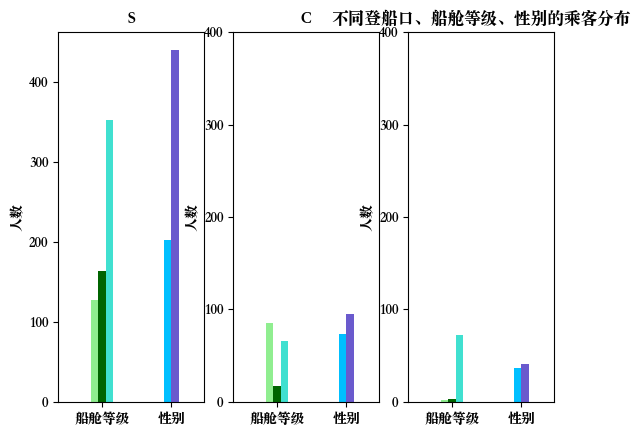

In [10]:
# 不同登船口、船舱等级、性别的乘客分布
S = data_train.Embarked  # 乘客的登船口数据
S1 = data_train.Pclass  # 乘客的船舱等级数据
S2 = data_train.Sex  # 乘客的性别数据

plt.subplot(131)  # 创建第一个子图
plt.title(u'S')  # 设置子图标题为'S'
plt.bar([0.5,0.6,0.7], S1[S=='S'].value_counts().sort_index(), width=0.1, color=['lightgreen','darkgreen','turquoise'])
plt.bar([1.5,1.6], S2[S=='S'].value_counts().sort_index(), width=0.1, color=['deepskyblue','slateblue'])
plt.xlim([0,2])
plt.xticks([0.6,1.55], [u'船舱等级',u'性别'])
plt.yticks(range(0,500,100))
plt.ylabel(u'人数')

plt.subplot(132)  # 创建第二个子图
plt.title(u'C')  # 设置子图标题为'C'
plt.bar([0.5,0.6,0.7], S1[S=='C'].value_counts().sort_index(), width=0.1, color=['lightgreen','darkgreen','turquoise'])
plt.bar([1.5,1.6], S2[S=='C'].value_counts().sort_index(), width=0.1, color=['deepskyblue','slateblue'])
plt.xlim([0,2])
plt.xticks([0.6,1.55], [u'船舱等级',u'性别'])
plt.yticks(range(0,500,100))
plt.ylabel(u'人数')

plt.subplot(133)  # 创建第三个子图
plt.title(u'Q')  # 设置子图标题为'Q'
plt.bar([0.5,0.6,0.7], S1[S=='Q'].value_counts().sort_index(), width=0.1, color=['lightgreen','darkgreen','turquoise'])
plt.bar([1.5,1.6], S2[S=='Q'].value_counts().sort_index(), width=0.1, color=['deepskyblue','slateblue'])
plt.xlim([0,2])
plt.xticks([0.6,1.55], [u'船舱等级',u'性别'])
plt.yticks(range(0,500,100))
plt.ylabel(u'人数')
plt.title("不同登船口、船舱等级、性别的乘客分布")

plt.show()

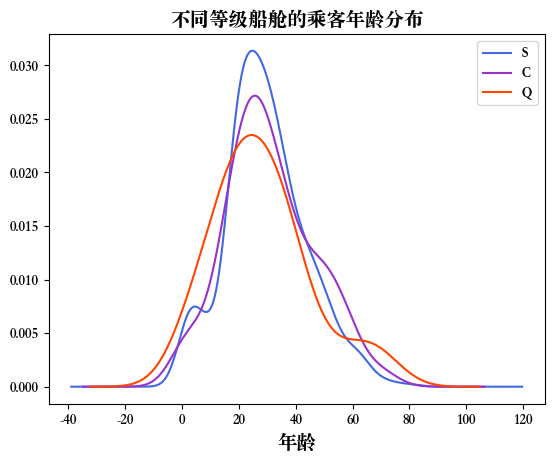

In [11]:
# 不同等级船舱的乘客年龄分布
S1 = data_train.Age  # 乘客的年龄数据
S2 = data_train.Embarked  # 乘客的登船口数据

S1[S2=='S'].plot(kind='kde', label='S', color='royalblue')  # 在登船口为'S'的乘客中绘制年龄的核密度估计曲线，标签为'S'，颜色为'royalblue'
S1[S2=='C'].plot(kind='kde', label='C', color='darkorchid')  # 在登船口为'C'的乘客中绘制年龄的核密度估计曲线，标签为'C'，颜色为'darkorchid'
S1[S2=='Q'].plot(kind='kde', label='Q', color='orangered')  # 在登船口为'Q'的乘客中绘制年龄的核密度估计曲线，标签为'Q'，颜色为'orangered'

plt.xlabel('年龄', size=14)  # 设置x轴标签为'年龄'，字体大小为14
plt.ylabel('')  # 设置y轴标签为空
plt.legend()  # 显示图例
plt.title('不同等级船舱的乘客年龄分布', size=14)  # 设置图表标题为'不同等级船舱的乘客年龄分布'，字体大小为14

plt.show()  # 显示图表

/var/folders/vy/z7l1jnls29v7m62swyrhcm800000gn/T/ipykernel_37018/1494022498.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  S1.loc[S1 == 0] = -1  # 将获救情况为0的乘客的标签改为-1


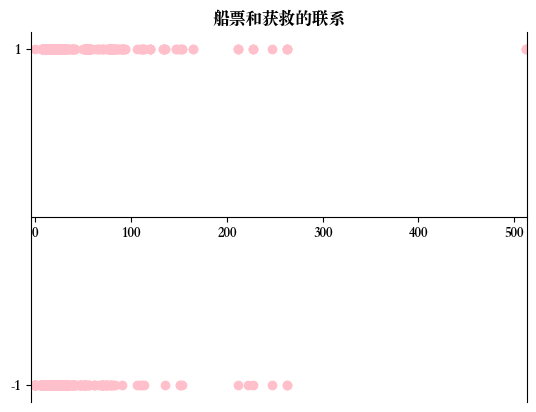

In [12]:
# 船票和获救的联系
S = data_train.sort_values('Fare')  # 按照船票价格对数据进行排序，将结果存储在变量S中
S1 = S.Survived  # 乘客的获救情况数据
S2 = S.Fare  # 乘客的船票价格数据

S1.loc[S1 == 0] = -1  # 将获救情况为0的乘客的标签改为-1

plt.scatter(S2, S1, color='pink')  # 绘制船票价格和获救情况的散点图，散点颜色为'pink'
plt.xlim([-5, 513])  # 设置x轴范围
plt.yticks([-1, 1])  # 设置y轴刻度为-1和1
ax = plt.gca()  # 获取当前的Axes对象
ax.spines['bottom'].set_position(('data', 0))  # 设置x轴的位置在y=0的位置
ax.spines['top'].set_color('none')  # 隐藏顶部的边框线
plt.title("船票和获救的联系")  # 设置图表标题为"船票和获救的联系"

plt.show()  # 显示图表

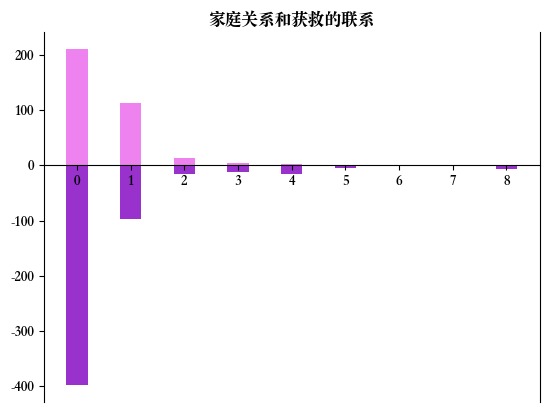

In [13]:
# 家庭关系和获救的联系
S = data_train  # 使用原始数据集，并将其存储在变量S中
S1 = S.Survived  # 乘客的获救情况数据
S2 = S.SibSp[S1 == 1].value_counts().sort_index()  # 获救的乘客中不同家庭关系数量的统计结果
S3 = S.SibSp[S1 == 0].value_counts().sort_index()  # 未获救的乘客中不同家庭关系数量的统计结果

plt.bar(S2.index, S2, width=0.4, color='violet')  # 绘制获救的乘客中不同家庭关系数量的柱状图，柱状的颜色为'violet'
plt.bar(S3.index, -S3, width=0.4, color='darkorchid')  # 绘制未获救的乘客中不同家庭关系数量的柱状图，柱状的颜色为'darkorchid'
plt.xticks(range(0, 9))  # 设置x轴刻度为0到8
ax = plt.gca()  # 获取当前的Axes对象
ax.spines['bottom'].set_position(('data', 0))  # 设置x轴的位置在y=0的位置
ax.spines['top'].set_color('none')  # 隐藏顶部的边框线
plt.title('家庭关系和获救的联系')  # 设置图表标题为'家庭关系和获救的联系'

plt.show()  # 显示图表

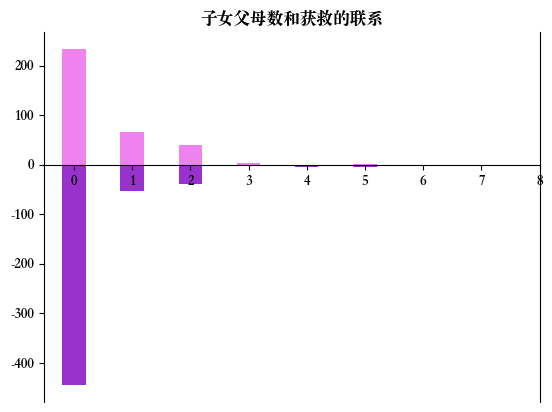

In [14]:
# 子女父母数和获救的联系
S = data_train  # 使用原始数据集，并将其存储在变量S中
S1 = S.Survived  # 乘客的获救情况数据
S2 = S.Parch[S1 == 1].value_counts().sort_index()  # 获救的乘客中不同子女父母数数量的统计结果
S3 = S.Parch[S1 == 0].value_counts().sort_index()  # 未获救的乘客中不同子女父母数数量的统计结果

plt.bar(S2.index, S2, width=0.4, color=['violet'])  # 绘制获救的乘客中不同子女父母数数量的柱状图，柱状的宽度为0.4，颜色为'violet'
plt.bar(S3.index, -S3, width=0.4, color=['darkorchid'])  # 绘制未获救的乘客中不同子女父母数数量的柱状图，柱状的宽度为0.4，颜色为'darkorchid'
plt.xticks(range(0, 9))  # 设置x轴刻度为0到8
ax = plt.gca()  # 获取当前的Axes对象
ax.spines['bottom'].set_position(('data', 0))  # 设置x轴的位置在y=0的位置
ax.spines['top'].set_color('none')  # 隐藏顶部的边框线
plt.title('子女父母数和获救的联系')  # 设置图表标题为'子女父母数和获救的联系'

plt.show()  # 显示图表

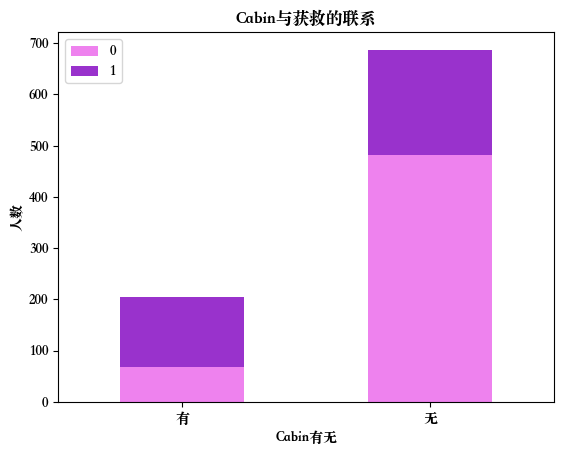

In [15]:
# Cabin与获救的联系
Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()  # 存储有Cabin信息的乘客的获救情况统计结果
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()  # 存储没有Cabin信息的乘客的获救情况统计结果
df = pd.DataFrame({u'有': Survived_cabin, u'无': Survived_nocabin}).transpose()  # 创建一个DataFrame，包含有Cabin和无Cabin的获救情况统计结果
df.plot(kind='bar', stacked=True, color=['violet', 'darkorchid'])  # 绘制堆叠柱状图，表示有Cabin和无Cabin的乘客的获救情况
plt.title(u"Cabin与获救的联系")  # 设置图表标题为'Cabin与获救的联系'
plt.xticks(rotation=0)  # x轴刻度不旋转
plt.xlabel(u"Cabin有无")  # 设置x轴标签为'Cabin有无'
plt.ylabel(u"人数")  # 设置y轴标签为'人数'

plt.show()  # 显示图表

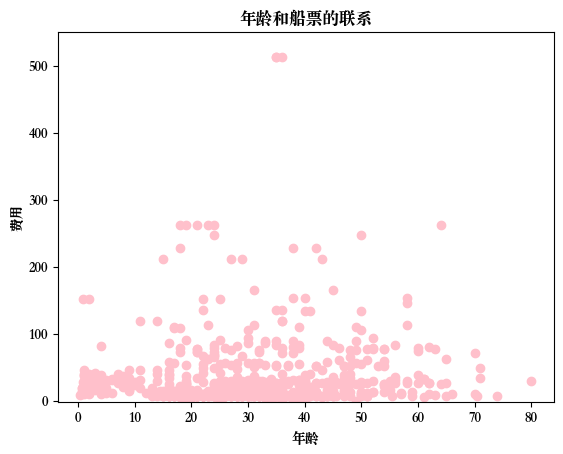

In [16]:
# 年龄和船票的联系
S = data_train.sort_values('Age')  # 按照年龄对数据集进行排序，存储在变量S中
S1 = data_train.Age  # 年龄数据
S2 = data_train.Fare  # 船票费用数据

plt.scatter(S1, S2, color='pink')  # 绘制散点图，横轴为年龄，纵轴为船票费用，点的颜色为'pink'
plt.xlabel(u'年龄')  # 设置x轴标签为'年龄'
plt.ylabel(u'费用')  # 设置y轴标签为'费用'
plt.title(u"年龄和船票的联系")  # 设置图表标题为'年龄和船票的联系'
plt.ylim(-1, 550)  # 设置y轴的取值范围为-1到550

plt.show()  # 显示图表

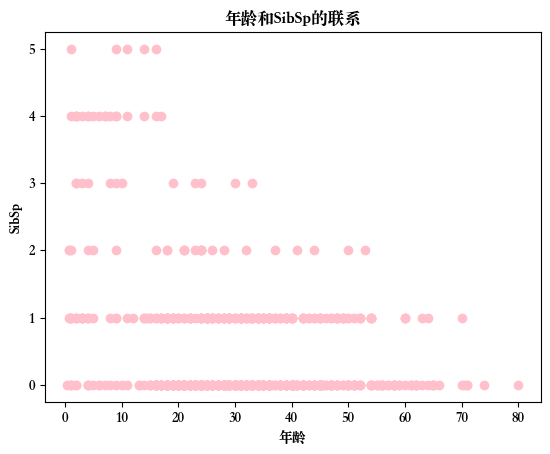

In [17]:
# 年龄和SibSp的联系
S = data_train.sort_values('Age')  # 按照年龄对数据集进行排序，存储在变量S中
S1 = data_train.Age  # 年龄数据
S2 = data_train.SibSp  # SibSp数据

plt.scatter(S1, S2, color='pink')  # 绘制散点图，横轴为年龄，纵轴为SibSp，点的颜色为'pink'
plt.xlabel(u'年龄')  # 设置x轴标签为'年龄'
plt.ylabel(u'SibSp')  # 设置y轴标签为'SibSp'
plt.title("年龄和SibSp的联系")  # 设置图表标题为'年龄和SibSp的联系'

plt.show()  # 显示图表

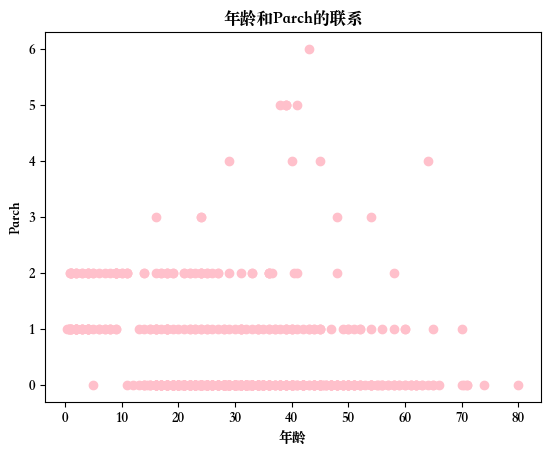

In [18]:
# 年龄和Parch的联系
S = data_train.sort_values('Age')  # 按照年龄对数据集进行排序，存储在变量S中
S1 = data_train.Age  # 年龄数据
S2 = data_train.Parch  # Parch数据

plt.scatter(S1, S2, color='pink')  # 绘制散点图，横轴为年龄，纵轴为Parch，点的颜色为'pink'
plt.xlabel(u'年龄')  # 设置x轴标签为'年龄'
plt.ylabel(u'Parch')  # 设置y轴标签为'Parch'
plt.title("年龄和Parch的联系")  # 设置图表标题为'年龄和Parch的联系'

plt.show()  # 显示图表

In [19]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    
    # 把选定特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    
    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
   # print(known_age)
    unknown_age = age_df[age_df.Age.isnull()].values
    
    # y即目标年龄
    y = known_age[:, 0]
   # print(y)
    
    # X即特征属性值
    X = known_age[:, 1:]
   # print(X)
    
    # random_state表示一个种子的值，n_estimators表示子树的值，n_jobs表示最大的处理器，-1表示不限制
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    # fit到RandomForestRegressor之中
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1:])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr
    

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

# 缺失值处理
data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


第4步：特征因子化

In [20]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')
# 对Cabin，Embarked，Sex，Pclass四个分类变量进行了虚拟变量转换，也可以称之为指示变量，并分别指定了不同的前缀
# 合成数据集
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
# 删除指定数据集，axis为0(index) or 1(columns),inpalace表示是否对内部操作，如果True则不返回
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
# 在DataFrame中删除指定的列，并且在原始数据上进行修改，不返回新的DataFrame


第5步：处理浮动较大的数值

In [21]:
# 处理数据集中浮动较大的数值到(-1,1)之间
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
# fit的数据需要以2维([[]])的形式传入
age_scale_param = scaler.fit(df[['Age']])
# scaler对象（一个StandardScaler实例）对df[[‘Age’]]这个DataFrame进行拟合，计算出Age列的均值和标准差，并将这些参数保存在age_scale_param变量中
# 将fit的数据处理后的结果以np.array的形式返回
df['Age_scaled'] =age_scale_param.transform(df[['Age']])
fare_scale_param = scaler.fit(df[['Fare']])
df['Fare_scaled'] = fare_scale_param.transform(df[['Fare']])
# 对df[[‘Fare’]]这个DataFrame进行拟合，计算出Fare列的均值和标准差，并将这些参数保存在fare_scale_param变量中
# 对Age和Fare进行标准化处理，即减去均值，除以标准差，使得每个变量的均值为0，标准差为1
df['Age']=df['Age_scaled']
df['Fare']=df['Fare_scaled']
df
# 最后得到的df数据情况如下所示
#df.to_csv('look.csv')


,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,-0.561377,1,0,-0.502445,1,0,0,0,1,0,1,0,0,1,-0.561377,-0.502445
1,2,1,0.613173,1,0,0.786845,0,1,1,0,0,1,0,1,0,0,0.613173,0.786845
2,3,1,-0.267740,0,0,-0.488854,1,0,0,0,1,1,0,0,0,1,-0.267740,-0.488854
3,4,1,0.392945,1,0,0.420730,0,1,0,0,1,1,0,1,0,0,0.392945,0.420730
4,5,0,0.392945,0,0,-0.486337,1,0,0,0,1,0,1,0,0,1,0.392945,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.194330,0,0,-0.386671,1,0,0,0,1,0,1,0,1,0,-0.194330,-0.386671
887,888,1,-0.781606,0,0,-0.044381,0,1,0,0,1,1,0,1,0,0,-0.781606,-0.044381
888,889,0,-0.988244,1,2,-0.176263,1,0,0,0,1,1,0,0,0,1,-0.988244,-0.176263
889,890,1,-0.267740,0,0,-0.044381,0,1,1,0,0,0,1,1,0,0,-0.267740,-0.044381


第6步：筛选数据

In [22]:
# 筛选数据(结果+特征)
# 利用正则表达式
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*') #表示任意字符重复任意次数
# DataFrame进行筛选，参数regex表示要匹配的正则表达式，axis默认为1，表示沿着列的方向进行筛选
# train_df.to_csv('look_filter.csv')
train_np = train_df.values
# 将筛选出的列组成一个新的DataFrame，赋值给train_df变量


第7步：数据建模

In [23]:
# y即Survival结果
y = train_np[:, 0]
# 在train_np这个数组中选择第0列的所有元素，赋值给y变量
# X即特征属性值
X = train_np[:, 1:]
# 从train_np这个数组中选择除了第0列之外的所有列，赋值给X变量

from sklearn import linear_model
# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
# 创建一个LogisticRegression的对象，命名为clf，并指定参数
clf.fit(X, y)


LogisticRegression(penalty='l1', solver='liblinear', tol=1e-06)

第8步：测试集预处理

In [24]:
# 测试集预处理

data_test = pd.read_csv(r'test.csv') #读取文件并将其存储在名为 data_test 的 DataFrame 中
 
# 缺失值处理
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']] #创建临时的 DataFrame tmp_df，包括 'Age'、'Fare'、'Parch'、'SibSp' 和 'Pclass' 列
null_age = tmp_df[data_test.Age.isnull()].values
X = null_age[:, 1:]#找出 'Age' 列中缺失值的行，并存储在名为 null_age的DataFrame 中
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)

# 向量化
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')
#对类别列 'Cabin'、'Embarked'、'Sex' 和 'Pclass' 执行独热编码
# 合成新的数据集
df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)  #连接所有的 DataFrame，创建一个名为 df_test 的新 DataFrame
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# 处理浮动值大的数据
age_scale_param = scaler.fit(df_test[['Age']])#对 'Age' 和 'Fare' 列执行特征缩放
df_test['Age_scaled'] =age_scale_param.transform(df_test[['Age']])
fare_scale_param = scaler.fit(df_test[['Fare']])
df_test['Fare_scaled'] = fare_scale_param.transform(df_test[['Fare']])
df_test['Age']=df_test['Age_scaled']
df_test['Fare']=df_test['Fare_scaled']#创建新的 'Age_scaled' 和 'Fare_scaled' 列，并将缩放后的值赋给原始列 'Age' 和 'Fare'

# 筛选数据(特征)
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*') #使用 filter 方法筛选出符合特定正则表达式的列
test = test.values
# test


第9步：结果预测

In [25]:
# 筛选数据(特征)
predictions = clf.predict(test)#机器学习模型 clf 对测试数据 test 进行预测
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)}) #创建一个新的DataFrame称为 result
result.to_csv("reslut_1.csv", index=False)#使用 Pandas 的 to_csv 方法将结果DataFrame保存为一个名为 reslut_1.csv 的文件


第10步：逻辑回归优化

In [26]:
# 模型系数关联分析
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)}) # LR模型系数

,columns,coef
0,SibSp,[-0.34423370501864453]
1,Parch,[-0.10491796422083012]
2,Cabin_No,[-0.2538030613771502]
3,Cabin_Yes,[0.6482859348846787]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.4172613691212595]
7,Sex_female,[2.2103727684378387]
8,Sex_male,[-0.4236149443405415]
9,Pclass_1,[0.34116799417813204]


In [27]:
# 交叉验证
from sklearn.model_selection import cross_val_score, train_test_split
#导入了需要的库
# 简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear') #使用逻辑回归模型 linear_model.LogisticRegression 创建一个分类器（clf）
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#设置参数，如正则化强度（C）、正则化类型（penalty）、收敛阈值（tol），以及解决方案类型（solver）
X = all_data.values[:,1:]
y = all_data.values[:,0]
cross_val_score = cross_val_score(clf, X, y, cv=5)
#特征数据（X）包括所有数据的第2列及以后的列 目标数据（y）包括所有数据的第1列，即 'Survived' 列
cross_val_score


array([0.81564246, 0.80898876, 0.78651685, 0.78651685, 0.81460674])

特征挖掘

In [28]:
# 分割数据
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#使用 train_test_split 函数将数据集 df 分为训练集 (split_train) 和交叉验证集 (split_cv)，其中测试集占总数据的 30%
# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear') #创建逻辑回归模型 clf
clf.fit(train_df.values[:,1:], train_df.values[:,0]) #使用训练集 train_df 中的特征数据（除了 'Survived' 列）来训练模型

# 对cross validation数据进行预测
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:,1:])
predictions
# split_cv[ predictions != cv_df.values[:,0]].drop()
# # 出现这个报错：ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

# 去除预测错误的case看原始dataframe数据
# split_cv['PredictResult'] = predictions
origin_data_train = pd.read_csv("Train.csv") #使用 Pandas 的 pd.read_csv("Train.csv") 从名为 "Train.csv" 的 CSV 文件中读取原始训练数据集
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases
#通过 split_cv[predictions != cv_df.values[:,0]] 找到在交叉验证集中，模型的预测结果与实际结果不一致的样本

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


In [29]:
data_train[data_train['Name'].str.contains("Major")]
#用于从名为 data_train 的DataFrame中筛选出包含 "Major" 的字符串的样本


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,Yes,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,Yes,S


In [30]:
# 继续特征挖掘
data_train = pd.read_csv("Train.csv")
data_train['Sex_Pclass'] = data_train.Sex + "_" + data_train.Pclass.map(str) # 性别_乘客等级合并
data_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male_3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female_1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female_3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female_1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male_2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female_1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female_3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male_1


补全缺失值

In [31]:
from sklearn.ensemble import RandomForestRegressor
 
# 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    #用于填充缺失的年龄数据的函数
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr

def set_Cabin_type(df):
    #用于处理舱室类型（'Cabin'）
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    #将非缺失的 'Cabin' 值标记为 "Yes"，将缺失的 'Cabin' 值标记为 "No"
    #将 'Cabin' 特征转换为一个二元特征，表示乘客是否拥有舱室信息
    return df


特征因子化

In [32]:
data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
#使用之前定义的 set_missing_ages 函数，对原始训练数据集 data_train 进行年龄数据的填充
# 向量化
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')
dummies_Sex_Pclass = pd.get_dummies(data_train['Sex_Pclass'], prefix= 'Sex_Pclass')
#创建了多个虚拟变量（dummies）来表示 'Cabin'、'Embarked'、'Sex'、'Pclass' 和 'Sex_Pclass' 这些特征
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass, dummies_Sex_Pclass], axis=1)
#使用 Pandas 的 pd.concat 函数将原始数据集 data_train 和独热编码后的虚拟变量合并成一个新的数据框 df
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Sex_Pclass'], axis=1, inplace=True)
#合并时，删除了原始数据集中不再需要的特征，包括 'Pclass'、'Name'、'Sex'、'Ticket'、'Cabin'、'Embarked' 和 'Sex_Pclass' 列
df


,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,...,Sex_male,Pclass_1,Pclass_2,Pclass_3,Sex_Pclass_female_1,Sex_Pclass_female_2,Sex_Pclass_female_3,Sex_Pclass_male_1,Sex_Pclass_male_2,Sex_Pclass_male_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,4,1,35.000000,1,0,53.1000,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
887,888,1,19.000000,0,0,30.0000,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
888,889,0,16.185117,1,2,23.4500,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
889,890,1,26.000000,0,0,30.0000,0,1,1,0,...,1,1,0,0,0,0,0,1,0,0


处理浮动较大的数值

In [33]:
# 处理数据集中浮动较大的数值到(-1,1)之间
import sklearn.preprocessing as preprocessing
#导入了标准化相关的库 sklearn.preprocessing 中的 StandardScaler
scaler = preprocessing.StandardScaler()

# fit的数据需要以2维([[]])的形式传入
age_scale_param = scaler.fit(df[['Age']])
#通过 scaler.fit(df[['Age']]) 对 'Age' 列进行拟合，以获取标准化所需的参数
# 将fit的数据处理后的结果以np.array的形式返回
df['Age_scaled'] = scaler.fit_transform(df[['Age']], age_scale_param)
fare_scale_param = scaler.fit(df[['Fare']])
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']], fare_scale_param)
#输出带有标准化后的 'Age_scaled' 和 'Fare_scaled' 列的数据集 df
df


,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,...,Pclass_2,Pclass_3,Sex_Pclass_female_1,Sex_Pclass_female_2,Sex_Pclass_female_3,Sex_Pclass_male_1,Sex_Pclass_male_2,Sex_Pclass_male_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,...,0,1,0,0,0,0,0,1,-0.561377,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,...,0,0,1,0,0,0,0,0,0.613173,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,...,0,1,0,0,1,0,0,0,-0.267740,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,...,0,0,1,0,0,0,0,0,0.392945,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,...,0,1,0,0,0,0,0,1,0.392945,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,1,0,0,0,...,1,0,0,0,0,0,1,0,-0.194330,-0.386671
887,888,1,19.000000,0,0,30.0000,0,1,0,0,...,0,0,1,0,0,0,0,0,-0.781606,-0.044381
888,889,0,16.185117,1,2,23.4500,1,0,0,0,...,0,1,0,0,1,0,0,0,-0.988244,-0.176263
889,890,1,26.000000,0,0,30.0000,0,1,1,0,...,0,0,0,0,0,1,0,0,-0.267740,-0.044381


筛选数据

In [34]:
# 筛选数据(结果+特征)
# 利用正则表达式
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*')
train_np = train_df.values


数据建模

In [35]:
# y即Survival结果
y = train_np[:, 0]
#通过 train_np[:, 0] 获取目标变量，即 'Survived' 列，将其存储在名为 y 的变量中
# X即特征属性值
X = train_np[:, 1:]
#通过 train_np[:, 1:] 获取特征属性值，将其存储在名为 X 的变量中。这包括了除 'Survived' 列之外的所有特征

from sklearn import linear_model
# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
clf.fit(X, y)
#使用 clf.fit(X, y) 对训练数据进行拟合，其中 X 是特征属性值，y 是目标变量（生存结果）
clf


LogisticRegression(penalty='l1', solver='liblinear', tol=1e-06)

测试集预处理

In [36]:
# 测试集预处理
data_test = pd.read_csv("test.csv")

# 缺失值处理
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
#处理缺失值。如果 'Fare' 列有缺失值，将其填充为0
data_test['Sex_Pclass'] = data_test.Sex + "_" + data_test.Pclass.map(str)
#创建一个新的特征 'Sex_Pclass'，将 'Sex' 和 'Pclass' 组合在一起
# 对test_data做和train_data中一致的特征变换
# 用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values

# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

# 向量化
data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')
dummies_Sex_Pclass = pd.get_dummies(data_test['Sex_Pclass'], prefix= 'Sex_Pclass')
#对测试数据集中的分类变量进行独热编码，包括 'Cabin'、'Embarked'、'Sex'、'Pclass' 和 'Sex_Pclass' 特征。
# 合成新的数据集
df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass, dummies_Sex_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Sex_Pclass'], axis=1, inplace=True)

# 处理浮动值大的数据
df_test['Age_scaled'] = scaler.fit_transform(df_test[['Age']], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test[['Fare']], fare_scale_param)
#使用之前定义的标准化参数 age_scale_param 和 fare_scale_param，对 'Age' 和 'Fare' 列进行标准化
df_test


,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,...,Pclass_2,Pclass_3,Sex_Pclass_female_1,Sex_Pclass_female_2,Sex_Pclass_female_3,Sex_Pclass_male_1,Sex_Pclass_male_2,Sex_Pclass_male_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0.307526,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1.256242,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,...,1,0,0,0,0,0,1,0,2.394702,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,...,0,1,0,0,0,0,0,1,-0.261704,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,...,0,1,0,0,1,0,0,0,-0.641190,-0.416740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.705727,0,0,8.0500,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0.019551,-0.492680
414,1306,39.000000,0,0,108.9000,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0.649064,1.314641
415,1307,38.500000,0,0,7.2500,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0.611115,-0.507017
416,1308,30.705727,0,0,8.0500,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0.019551,-0.492680


结果预测

In [37]:
# 筛选数据(特征)
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*')
#使用 df_test.filter(regex=...) 筛选测试数据中的特征列，以便用于预测
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("result_2.csv", index=False)
#使用 result.to_csv("result_2.csv", index=False) 将结果保存为名为 "result_2.csv" 的CSV文件

/Users/jinanzai/anaconda3/lib/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


第11步：模型融合

In [38]:
# 导入sklearn中的BaggingRegressor用于构建集成回归模型。
from sklearn.ensemble import BaggingRegressor

# 正则表达式处理
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values

# y即Survival结果
y = train_np[:, 0]
# X即特征属性值
X = train_np[:, 1:]
#从筛选后的数据中获取目标变量 y（'Survived' 列）和特征属性 X
# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6, solver='liblinear')
# 使用逻辑回归模型 linear_model.LogisticRegression 创建一个基础的回归模型 clf
# 根据需要进行调参
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
#使用 BaggingRegressor 构建集成回归模型 bagging_clf
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
#使用集成模型 bagging_clf 对测试数据进行预测，与之前的逻辑回归模型不同，这里使用了集成模型进行预测
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
#将预测结果存储在名为 result 的DataFrame中
result.to_csv("result_bagging2.csv", index=False)
#使用 result.to_csv("result_bagging2.csv", index=False) 将结果保存为名为 "result_bagging2.csv" 的CSV文件

/Users/jinanzai/anaconda3/lib/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
